# Nearest Neighbor

__This material is heavily based on the popular Standford CS231n lecture material__. [Please check on their website for more detailed information](https://cs231n.github.io/).

There are several repositories that offer solutions to CS231n problem sets, for examples:
- https://github.com/lightaime/cs231n
- https://github.com/mantasu/cs231n
- https://github.com/jariasf/CS231n

## Required Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size": 10,
})

from utils import *

c:\Users\dinko\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Class KNearestNeighbor

Implementation of the __naive version__ of the algorithm: compute the distances from the test dataset to all stored training dataset.

In [2]:
from utils import * 

class KNearestNeighbor():
    def train(self, X, y):
        """
        - X: A 2D numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A 1D numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """        
        
        self.X_train = X
        self.y_train = y

        self.num_train = X.shape[0]

    
    def predict(self, X, k=1, L=2):
        """
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - L: Determines how the distances are measured (L=1 means L1-norm and L=2 
             means L2-norm).

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """

        num_test = X.shape[0]
        dists = compute_distances(self.X_train, X, L=L)
        y_pred = np.zeros(num_test, dtype=self.y_train.dtype)
           
        for i in range(num_test):
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            v, n = np.unique(closest_y, return_counts=True)
            y_pred[i] = v[np.argmax(n)]
    
        return y_pred

## Heart Disease Prediction

In [3]:
data1 = pd.read_csv("./datasets/heart/Heart_Disease_Prediction.csv")
X1 = data1.drop('Heart Disease', axis=1)
y1 = data1['Heart Disease']

print("Dimension numbers :", X1.shape[1])
print("Number of data    :", X1.shape[0])
print("Labels            :", np.unique(y1))

Dimension numbers : 13
Number of data    : 270
Labels            : ['Absence' 'Presence']


Split the data:
* 70% for training
* 30% for testing

In [4]:
X_train1 = X1.iloc[0:189, :].to_numpy()
y_train1 = y1.iloc[0:189].to_numpy()
X_test1  = X1.iloc[190:, :].to_numpy()
y_test1  = y1.iloc[190:].to_numpy()

num_test1 = X_test1.shape[0]

### Train the Classifier

In [5]:
classifier1 = KNearestNeighbor()
classifier1.train(X_train1, y_train1)
y_test_pred1 = classifier1.predict(X_test1, k=5, L=1)

num_correct1 = np.sum(y_test_pred1 == y_test1)
accuracy1 = float(num_correct1) / float(num_test1)
print('Got %d / %d correct => accuracy: %f' % (num_correct1, num_test1, accuracy1))

Got 47 / 80 correct => accuracy: 0.587500


### Cross Validations


Here, we perform `k`-fold cross validation to find the best value of `k`. 
- For each possible value of `k`, run the k-nearest-neighbor algorithm `num_folds` times.  
- In each run, use all but one of the folds as training data. The unused fold is used as a validation set. 
- Store the accuracies for all fold and all values of `k` in the `k_to_accuracies` dictionary.       

`k_to_accuracies[k]` should be a list of length `num_folds` giving the different
accuracy values that we found when using that value of `k`.

In [6]:
num_folds1 = 8
k_choices1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

X_np = X1.to_numpy()
y_np = y1.to_numpy()

# Split up the training data into folds
X_train_folds1 = np.array_split(X_np, num_folds1)
y_train_folds1 = np.array_split(y_np, num_folds1)

# Perform k-fold cross validation to find the best value of k. For each        
k_to_accuracies1 = {}

for k in k_choices1:
    k_to_accuracies1[k] = []

    for i in range(num_folds1):
        N = np.arange(num_folds1)
        N = np.delete(N, i)
        X_train_temp1 = np.vstack([X_train_folds1[j] for j in N])
        y_train_temp1 = np.hstack([y_train_folds1[j] for j in N])

        # Train the classifier based on the training data
        classifier1.train(X_train_temp1, y_train_temp1)

        # Predict using the remaining fold representing validation data
        y_pred_temp1 = classifier1.predict(X_train_folds1[i], k=k, L=1)

        # Compute the accuracy of the predicted label
        num_correct1 = np.sum(y_pred_temp1 == y_train_folds1[i])
        k_to_accuracies1[k].append(num_correct1 / len(y_pred_temp1))

# Print out the computed accuracies
for k in sorted(k_to_accuracies1):
    accuracy1 = k_to_accuracies1[k]
    print('k = %d, average accuracy = %f, std accuracy = %f' % (k, np.mean(accuracy1), np.std(accuracy1)))


k = 1, average accuracy = 0.547794, std accuracy = 0.069294
k = 2, average accuracy = 0.526070, std accuracy = 0.057882
k = 3, average accuracy = 0.473930, std accuracy = 0.067882
k = 4, average accuracy = 0.489082, std accuracy = 0.071614
k = 5, average accuracy = 0.492758, std accuracy = 0.104783
k = 6, average accuracy = 0.511252, std accuracy = 0.097815
k = 7, average accuracy = 0.477718, std accuracy = 0.116867
k = 8, average accuracy = 0.496435, std accuracy = 0.118807
k = 9, average accuracy = 0.514817, std accuracy = 0.108814
k = 10, average accuracy = 0.522393, std accuracy = 0.100422
k = 11, average accuracy = 0.496546, std accuracy = 0.093901
k = 12, average accuracy = 0.507799, std accuracy = 0.088667
k = 13, average accuracy = 0.515486, std accuracy = 0.103419
k = 14, average accuracy = 0.518939, std accuracy = 0.075040
k = 15, average accuracy = 0.500446, std accuracy = 0.088859


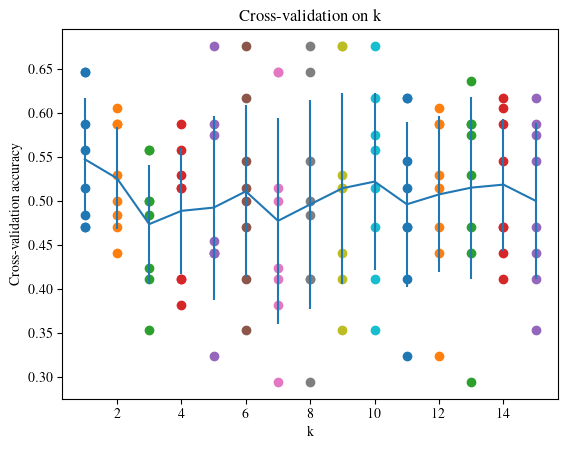

In [7]:
# Plot the raw observations
for k in k_choices1:
    accuracies1 = k_to_accuracies1[k]
    plt.scatter([k] * len(accuracies1), accuracies1)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean1 = np.array([np.mean(v) for k,v in sorted(k_to_accuracies1.items())])
accuracies_std1 = np.array([np.std(v) for k,v in sorted(k_to_accuracies1.items())])
plt.errorbar(k_choices1, accuracies_mean1, yerr=accuracies_std1)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

### The Best Value for `k`

Based on the cross-validation results above:
- choose the best value for k.   
- retrain the classifier using all the training data
- test it on the test data

In [8]:
best_k1 = k_choices1[accuracies_mean1.argmax()]
print('Best value for k: ', best_k1)

classifier1 = KNearestNeighbor()
classifier1.train(X_train1, y_train1)
y_test_pred1 = classifier1.predict(X_test1, k=best_k1, L=1)

# Compute and display the accuracy
num_correct1 = np.sum(y_test_pred1 == y_test1)
accuracy1 = float(num_correct1) / num_test1

print('Got %d of %d correct => accuracy: %f' % (num_correct1, num_test1, accuracy1))

Best value for k:  1
Got 43 of 80 correct => accuracy: 0.537500
